# Project :: Genre Classification from News Article Title.

Details:
Prepare a dataset. In one column have the newspaper article headline and another column will have
the associated Genre. Develop a classifier which predicts the genre given the headline. 

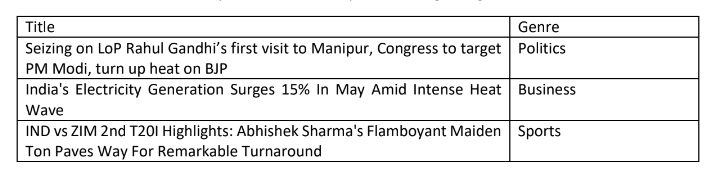

#### Few key steps:
 1. Data Collection    
 2. Data Preparation 
 3. Model Training   
 4. Evaluation       
    
   

## Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import joblib

## Read the Times Of India News Data 

In [2]:
# Load the dataset
df = pd.read_csv('TOI_News1.csv')

## Data Pre Processing

In [3]:
# Check the balance of the dataset
print(df['Genre'].value_counts())

Genre
Health           283
Business         274
Politics         142
Sports           132
Entertainment     75
Education         69
Religion          57
Technology        44
Life-Style        41
Name: count, dtype: int64


In [4]:
df.isnull().sum()

Headline    0
Genre       0
dtype: int64

## Visualizing the Data

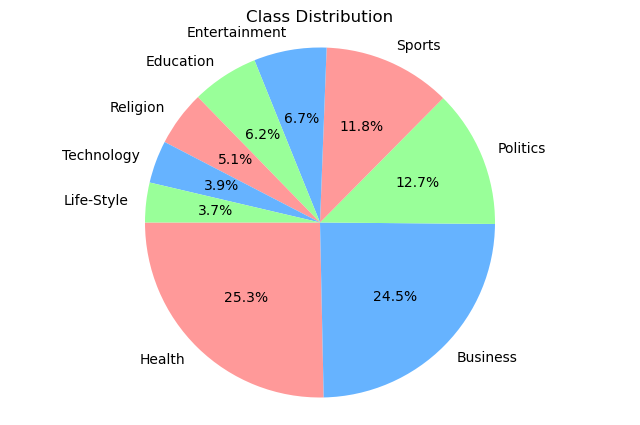

In [5]:
class_counts = df['Genre'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=180, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Splitting in training and Testing

In [6]:
# Preprocessing
X = df['Headline']  # Ensure the headlines are strings  .astype(str)
y = df['Genre']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [14]:
# Create a pipeline with a TF-IDF vectorizer and a Multinomial Naive Bayes classifier
model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', MultinomialNB())
])

In [15]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', MultinomialNB())])

In [16]:
# Make predictions
y_pred = model.predict(X_test)

In [17]:
# print(classification_report(y_test, y_pred))

In [18]:
# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6696428571428571


In [19]:
import joblib
# Save the model
joblib.dump(model, 'news_genre_classifier.pkl')

['news_genre_classifier.pkl']

In [20]:
import joblib

# Load the model from the .pkl file using joblib
model = joblib.load('news_genre_classifier.pkl')

In [23]:
headline = input("Enter A New Headline : ")
predicted_genre = model.predict([headline])[0]
print(f"The Headline is: {headline} \n The predicted genre for the headline is: {predicted_genre}")

The Headline is: Virat kis the most fevaroute player of mine. 
 The predicted genre for the headline is: Sports
